In [1]:
import sys
sys.path.append("../../../")

from context_exploration.data.envs.pendulum import NoActionRendererPendulumEnv
from context_exploration.model.loader import get_run_directory, load_config
from context_exploration.data.envs import make_env
from context_exploration.evaluation.process_calibration import plot_calibration_results

from IPython import display
import pickle as pkl
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
mpl.rcParams.update({'font.size': 12})
fig_scale = 1.8

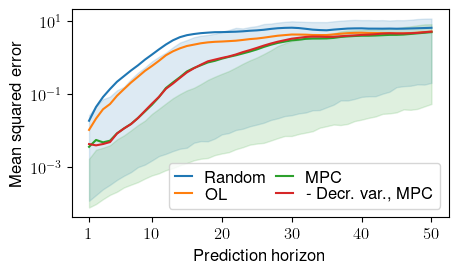

In [2]:
ID_LIST_RELU = [f"cr_s{s}_pendulum_bd_posweights_relu_npklw5" for s in [1, 2, 3]]
ID_LIST_FALSE = [f"cr_s{s}_pendulum_bd_posweights_False_npklw5" for s in [1, 2, 3]]

runs = [
    {
        # This is the 'base' method. Seed range is given by, e.g., {1-3}
        "id_list": ID_LIST_RELU,
        "label": "",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 30,
        "n_env_inits": 1,
        "cem_planning_horizon": 20,
        "has_minmax": ["rand", "mpc"]
    },
    {
        "id_list": ID_LIST_FALSE,
        "label": "- Decr. var.",
        "plot_opts": {"linestyle": "-"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 30,
        "n_env_inits": 1,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
]

data_ablation_runs = [
    {
        "id_list": ID_LIST_RELU,
        "label": "50T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 1,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "50T, 3R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 50,
        "n_env_inits": 3,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "30T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 30,
        "n_env_inits": 1,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "30T, 3R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 30,
        "n_env_inits": 3,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "15T, 1R",
        "plot_opts": {"linestyle": "--"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 15,
        "n_env_inits": 1,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    {
        "id_list": ID_LIST_RELU,
        "label": "15T, 3R",
        "plot_opts": {"linestyle": "-"},
        "criterion": "neg-entropy",
        "checkpoint_step": "100000_best",
        "rollout_length": 15,
        "n_env_inits": 3,
        "cem_planning_horizon": 20,
        "has_ol": False,
        "has_rand": False,
        "has_minmax": False
    },
    
]

plot_calibration_results(runs, fig_scale=fig_scale, aggregation="mean", legend=True, legend_kwargs={"ncol": 2, "loc": "lower right"})
plt.savefig("generated/pendulum_random_vs_mpc_results.pdf", bbox_inches="tight")

#plot_calibration_results(data_ablation_runs, fig_scale=fig_scale, aggregation="mean", legend=True, legend_kwargs={"ncol": 2})
#plt.savefig("generated/pendulum_rt_ablation.pdf", bbox_inches="tight")

In [3]:
run_id = "cr_s3_pendulum_bd_posweights_relu_npklw5"
checkpoint_step = "100000_best"
criterion = "neg-entropy"
calibration_rollout_length = 30
n_env_inits = 1
cem_planning_horizon = 20
run_directory = get_run_directory(run_id)
config = load_config(run_id)
print(config)
env_name = config["env_name"]
env = make_env(env_name)

{'batchsize': 512, 'context_dim': 16, 'context_encoder_classname': 'MLPContextEncoder', 'context_encoder_kwargs': {'aggregation_type': 'max', 'clamp_softplus_weights': True, 'latent_dim': 128, 'mean_feature_bidding': 'none', 'positive_weights': 'relu', 'rescale_raw_stddev': True}, 'ctx_from_train_prob_schedule': 'linear', 'debug': False, 'embedding_dim': 200, 'env_name': 'pendulum_quadrantactionfactorar2bd', 'grad_clip_norm': 1000, 'inference_approx': 'np', 'kl_all_factor': 0, 'kl_empty_factor': 1.0, 'kl_np_weight': 5, 'learning_rate': 0.001, 'max_ctx_card': 50, 'n_rollouts_train': 100000, 'n_rollouts_val': 10000, 'n_training_steps': 100000, 'obs_n_transitions': 50, 'seed': 3, 'sequence_logll_weight': 1, 'transition_model_classname': 'GruTransitionModel', 'transition_model_kwargs': {'big_nets': False, 'hidden_dependent_noise': True}}


/home/jan/envs/etc_bugfix/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


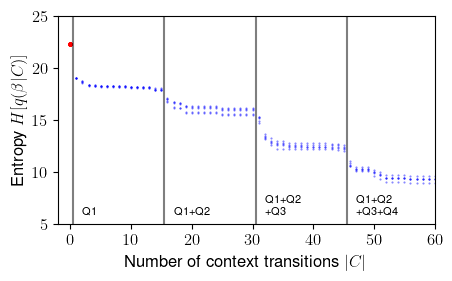

In [4]:
from context_exploration.evaluation.quadrant_pendulum_evaluation import quadrant_pendulum_entropy_plot
from context_exploration.data.envs import make_env
from context_exploration.model.loader import load_model

device = "cuda"
env_name, transition_model, context_encoder, log_likelihood_model = load_model(
    run_id, checkpoint_step, device
)
env = make_env(env_name)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.4*0.5*fig_scale, 1.5*fig_scale))
quadrant_pendulum_entropy_plot(env, context_encoder, ax_0=ax, ylim=(5,25), text_y=5.8, scatter_rad=0.25, scatter_alpha=0.5, scatter_marker="o")
ax.set_ylabel("Entropy "+r"$H[q(\beta|C)]$")
ax.set_xlabel("Number of context transitions "+"$|C|$")
plt.savefig("generated/pendulum_quadrant_evaluation.pdf", bbox_inches="tight")

In [5]:
calib_data_filename = (
    f"calibration_data_mpc_"
    f"{criterion}_"
    f"step{checkpoint_step}_"
    f"length{calibration_rollout_length}_"
    f"nenvinits{n_env_inits}_"
    f"{f'cemhorizon{cem_planning_horizon}_' if cem_planning_horizon != 20 else ''}"
    f"nctx50.pkl"
)
with open(run_directory.joinpath(calib_data_filename), "rb") as handle:
    rollouts = pkl.load(handle)

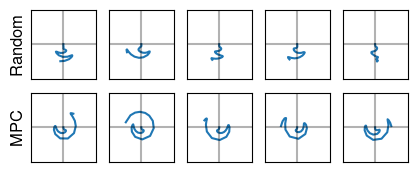

In [6]:
def print_pendulum_rollout_phasespace(observation_array, ax):
    th = np.arctan2(observation_array[:, 1], observation_array[:, 0])
    thdot = observation_array[:, 2]
    r = 0.05 * np.arange(thdot.shape[0])
    x = r * np.cos(th + np.pi / 2)
    y = r * np.sin(th + np.pi / 2)
    ax.plot(x, y)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.axvline(x=0, color="k", alpha=0.3)
    ax.axhline(y=0, color="k", alpha=0.3)
    ax.set_xticks([])
    ax.set_yticks([])

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5.4*0.5*fig_scale, 1.1*fig_scale), sharex=True, sharey=True)
for rollout_idx in range(5):   
    observation_array_random = rollouts[rollout_idx]["calibration_rollout_random"][0]["observation"]
    print_pendulum_rollout_phasespace(observation_array_random, ax[0, rollout_idx])
    observation_array_mpc = rollouts[rollout_idx]["calibration_rollout_mpc"][0]["observation"]
    print_pendulum_rollout_phasespace(observation_array_mpc, ax[1, rollout_idx])
ax[0, 0].set_ylabel("Random")
ax[1, 0].set_ylabel("MPC")
plt.savefig("generated/pendulum_random_vs_mpc_traj.pdf", bbox_inches="tight")

In [7]:
swingup_data_filename = (
    f"swingup_data_mpc_"
    f"{criterion}_"
    f"step{checkpoint_step}_"
    f"length{calibration_rollout_length}_"
    f"nenvinits{n_env_inits}_"
    f"nctx50.pkl"
)
with open(run_directory.joinpath(swingup_data_filename), "rb") as handle:
    swingup_data = pkl.load(handle)

In [8]:
swingup_data

,context_seed,initial_state_seed,total_reward,calib_type
0,98708651,87436128,-219.537171,mpc
1,98708651,87436128,-453.746601,random
2,15969107,66291471,-213.559298,mpc
3,15969107,66291471,-345.838554,random
4,68057750,23962602,-222.543996,mpc
...,...,...,...,...
95,16778834,57420627,-594.104598,random
96,75769296,19218220,-225.596918,mpc
97,75769296,19218220,-347.385721,random
98,76104729,73959425,-222.036648,mpc


In [9]:
mpc_reward = swingup_data[swingup_data["calib_type"]=="mpc"]["total_reward"].to_numpy()
random_reward = swingup_data[swingup_data["calib_type"]=="random"]["total_reward"].to_numpy()

In [10]:
mpc_gain = mpc_reward - random_reward

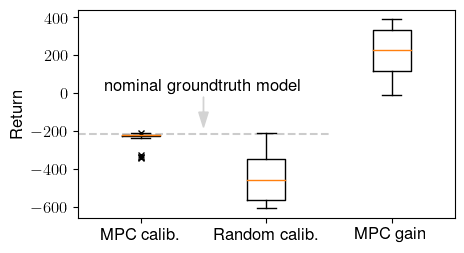

In [11]:
fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(5.4*0.5*fig_scale, 1.5*fig_scale))
ax1.boxplot(np.stack((mpc_reward, random_reward, mpc_gain), axis=1), flierprops={"marker": "x", "markersize": 4})
ax1.set_xticklabels(["MPC calib.", "Random calib.", "MPC gain"])
ax1.set_ylabel("Return")
ax1.plot(np.array([0.5, 2.5]), np.array([-215.91, -215.91]), color="k", alpha=0.2, linestyle="--")
ax1.text(x=1.5, y=30, s="nominal groundtruth model", horizontalalignment='center', verticalalignment='center')
ax1.arrow(1.5, -20, 0, -80, color="lightgray", alpha=1, head_width=0.075, head_length=80)
plt.savefig("generated/pendulum_mpc_vs_random_swingup.pdf", bbox_inches="tight")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


(500, 500, 3)
11.938526573129252
11.872901573129251
12.04090157312925
12.243026573129253


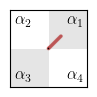

In [12]:
# run render_pendulum.py to get pendulum rendering
rendering = np.load("pendulum_rendering.npz")["arr_0"]
print(rendering.shape)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(1, 1), sharex=True, sharey=True)
ax.imshow(rendering)
ax.set_xticks([])
ax.set_yticks([])
import matplotlib.patches as patches
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
rect_1 = patches.Rectangle((250,0),250,250, linewidth=1, edgecolor='none',facecolor="gray", alpha=0.2)
#rect_2 = patches.Rectangle((0,0),250,250, linewidth=1, edgecolor='none',facecolor=color_cycle[1], alpha=0.2)
rect_3 = patches.Rectangle((0,250),250,250, linewidth=1, edgecolor='none',facecolor="gray", alpha=0.2)
#rect_4 = patches.Rectangle((250,250),250,250, linewidth=1, edgecolor='none',facecolor=color_cycle[3], alpha=0.2)
ax.add_patch(rect_1)
#ax.add_patch(rect_2)
ax.add_patch(rect_3)
#ax.add_patch(rect_4)

for quadrant in range(1, 5):
    text = rf"$\alpha_{quadrant}$"
    path = mpl.textpath.TextPath((0,0), text)
    text_width, text_height = path.get_extents().width, path.get_extents().height
    print(text_width)
    if quadrant == 1:
        x = 500 - 25
        y = 20
        ax.text(x, y, text, va="top", ha="right", bbox=dict(fill=False, edgecolor='none', linewidth=2))
    elif quadrant == 2:
        x = 30
        y = 20
        ax.text(x, y, text, va="top", ha="left", bbox=dict(fill=False, edgecolor='none', linewidth=2))
    elif quadrant == 3:
        x = 30
        y = 500 - 25
        ax.text(x, y, text, va="bottom", ha="left", bbox=dict(fill=False, edgecolor='none', linewidth=2))
    elif quadrant == 4:
        x = 500 - 25
        y = 500 - 25
        ax.text(x, y, text, va="bottom", ha="right", bbox=dict(fill=False, edgecolor='none', linewidth=2))
    
    

#ax.text(35, 70, r"$\alpha_2$", bbox=dict(fill=False, edgecolor='none', linewidth=2))
#ax.text(35, 500 - 50, r"$\alpha_3$", bbox=dict(fill=False, edgecolor='none', linewidth=2))
#ax.text(500 - 110, 500 - 50, r"$\alpha_4$", bbox=dict(fill=False, edgecolor='none', linewidth=2))
plt.savefig("generated/pendulum_quadrants.pdf", bbox_inches="tight")